In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import random

In [2]:
ed_exp = pd.read_csv("Resources/government-expenditure-on-education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')

In [3]:
recent_ed_exp=ed_exp.loc[ed_exp["Year"]>=2012]
recent_ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,AFG,2012,2.52441
11,Afghanistan,AFG,2013,3.47171
12,Afghanistan,AFG,2014,3.77759
13,Afghanistan,AFG,2015,3.24202
28,Albania,ALB,2013,3.53930
...,...,...,...,...
3523,Vietnam,VNM,2012,5.53329
3524,Vietnam,VNM,2013,5.65200
3571,Zimbabwe,ZWE,2012,7.29443
3572,Zimbabwe,ZWE,2013,7.40817


In [4]:
recent_ed_exp=recent_ed_exp.drop('Code', axis=1)
recent_ed_exp

,Entity,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,2012,2.52441
11,Afghanistan,2013,3.47171
12,Afghanistan,2014,3.77759
13,Afghanistan,2015,3.24202
28,Albania,2013,3.53930
...,...,...,...
3523,Vietnam,2012,5.53329
3524,Vietnam,2013,5.65200
3571,Zimbabwe,2012,7.29443
3572,Zimbabwe,2013,7.40817


In [5]:
ed_exp_mean=recent_ed_exp.groupby("Entity")["Government expenditure on education, total (% of GDP)"].mean()

In [6]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,3.253932
1,Albania,3.496470
2,Andorra,2.991917
3,Argentina,5.504788
4,Armenia,2.645420
...,...,...
142,United Kingdom,5.647870
143,United States of America,5.042710
144,Vanuatu,5.230350
145,Vietnam,5.592645


In [7]:
ed_exp_mean=ed_exp_mean.rename(columns={'Entity':'Country'})

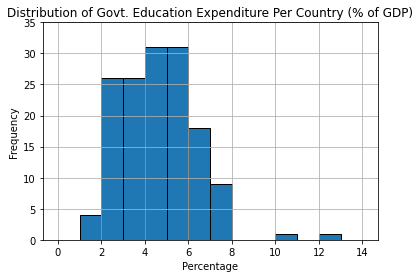

In [8]:
ed_exp_mean['Government expenditure on education, total (% of GDP)'].plot(kind='hist', edgecolor="black", bins=list(range(15)))
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Govt. Education Expenditure Per Country (% of GDP)')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.grid()
plt.savefig('Output/histogram_government_edu_exp.png')

In [9]:
ed_exp_mean=ed_exp_mean.set_index('Country')
ed_exp_mean

,"Government expenditure on education, total (% of GDP)"
Country,
Afghanistan,3.253932
Albania,3.496470
Andorra,2.991917
Argentina,5.504788
Armenia,2.645420
...,...
United Kingdom,5.647870
United States of America,5.042710
Vanuatu,5.230350


In [10]:
top_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)',ascending=False)
top_20=top_exp.head(20)
top_20

,"Government expenditure on education, total (% of GDP)"
Country,
Micronesia,12.459500
Grenada,10.293130
Iceland,7.812940
Denmark,7.789033
Sweden,7.685060
Moldova,7.506797
Norway,7.506583
Zimbabwe,7.411093
Malta,7.217503


In [11]:
bottom_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)')
bottom_20=bottom_exp.head(20)
bottom_20

,"Government expenditure on education, total (% of GDP)"
Country,
Monaco,1.376853
South Sudan,1.560855
Bermuda,1.654863
Cambodia,1.828213
Guinea-Bissau,2.066775
Sri Lanka,2.154724
Myanmar,2.165700
Bangladesh,2.213993
Congo,2.267855


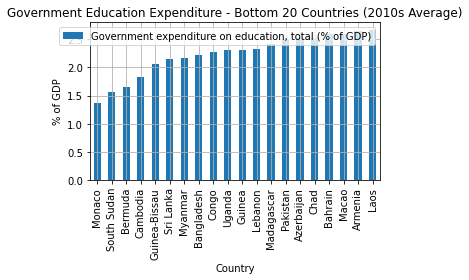

In [12]:
bottom_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure - Bottom 20 Countries (2010s Average)')
plt.grid()
plt.tight_layout()
plt.savefig("Output/bottom_20_expenditure.png")

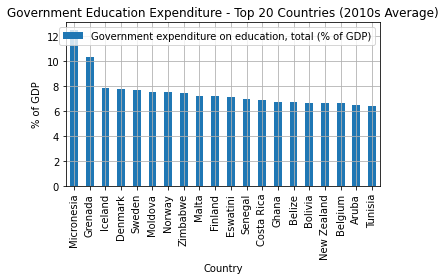

In [13]:
top_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure - Top 20 Countries (2010s Average)')
plt.grid()
plt.tight_layout()
plt.savefig("Output/top_20_expenditure.png")

In [14]:
ed_grad=ed_grad.drop(['COUNTRY', 'SEX','AGE', 'COUNTRY_ORIGIN', 'International students exclusion', 'ISC11_LEVEL_CAT', 'INDICATOR', 'Indicator', 'YEAR', 'Flag Codes','Flags'], axis=1)

In [15]:
ed_grad=ed_grad.loc[ed_grad['Year']>=2012]

In [16]:
ed_grad=ed_grad.dropna(subset=['Value'])

In [17]:
new=ed_grad.rename(columns={'Education level and programe orientation ':'Education Level'})
new

,Country,Gender,Age,Education Level,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23413,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2014,7.714
23414,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2015,8.439
23415,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2016,9.008
23416,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2017,8.883


In [18]:
bach_ed=new.loc[new['Education Level']=='Bachelor’s or equivalent level (ISCED2011 level 6)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,42.231148
Austria,19.641443
Belgium,39.308692
Canada,33.080941
Chile,28.537382
China,21.056000
Colombia,16.741667
Czechia,30.705212
Denmark,44.371557


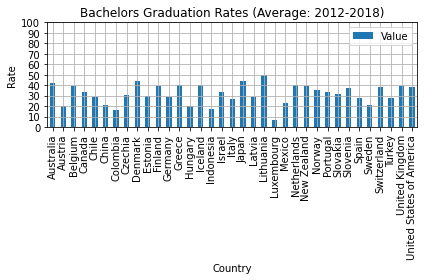

In [19]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Country')
plt.ylabel('Rate')
plt.title('Bachelors Graduation Rates (Average: 2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/bachelors_grad.png")

In [20]:
master_ed=new.loc[new['Education Level']=='Master’s or equivalent level (ISCED2011 level 7)']
master_ed=master_ed.groupby('Country')['Value'].mean()
master_ed=master_ed.reset_index()
master_ed=master_ed.set_index('Country')
master_ed

,Value
Country,
Australia,10.234230
Austria,15.989393
Belgium,13.237077
Canada,8.464647
Chile,6.746059
China,2.138333
Colombia,6.446667
Czechia,21.530096
Denmark,24.164623


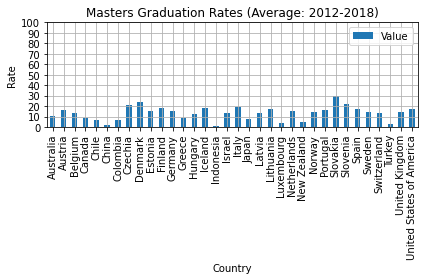

In [21]:
master_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Country')
plt.ylabel('Rate')
plt.title('Masters Graduation Rates (Average: 2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/masters_grad.png")

In [22]:
doc_ed=new.loc[new['Education Level']=='Doctoral or equivalent level  (ISCED2011 level 8)']
doc_ed=doc_ed.groupby('Country')['Value'].mean()
doc_ed=doc_ed.reset_index()
doc_ed=doc_ed.set_index('Country')
doc_ed

,Value
Country,
Australia,1.182459
Austria,1.273311
Belgium,0.571365
Canada,0.928451
Chile,0.145135
China,0.219000
Colombia,0.024333
Czechia,1.144782
Denmark,1.799639


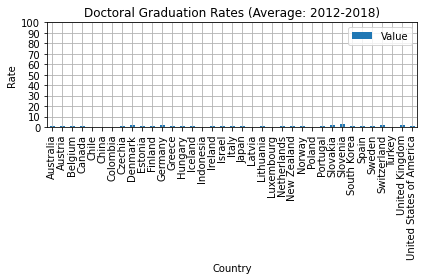

In [23]:
doc_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Country')
plt.ylabel('Rate')
plt.title('Doctoral Graduation Rates (Average: 2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/doctoral_grad.png")

In [24]:
high_school=new.loc[new['Education Level']=='Upper secondary education (ISCED2011 level 3)']
high_school

,Country,Gender,Age,Education Level,Year,Value
113,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2012,86.940
114,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2013,80.468
115,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2014,83.246
116,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2015,81.468
117,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2016,80.639
...,...,...,...,...,...,...
23403,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2014,65.791
23404,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2015,70.456
23405,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2016,73.575
23406,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2017,74.471


In [25]:
high_school=high_school.groupby('Country')['Value'].mean()
high_school=high_school.reset_index()
high_school

,Country,Value
0,Austria,82.093143
1,Belgium,31.063250
2,Brazil,59.883600
3,Canada,84.755952
4,Chile,85.456190
5,Colombia,71.649889
6,Costa Rica,35.111083
7,Czechia,77.204286
8,Denmark,81.617905
9,Estonia,82.841667


In [26]:
high_school=high_school.set_index('Country')

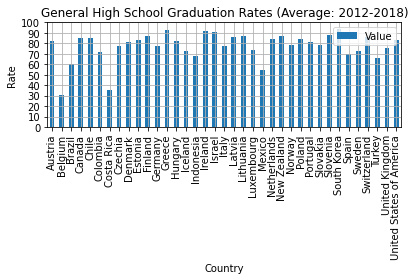

In [27]:
high_school.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Country')
plt.ylabel('Rate')
plt.title('General High School Graduation Rates (Average: 2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/high_school_grad.png")

In [28]:
crm_pers_held

,Region,Subregion,Country,Source,Year,count,rate
0,Asia,Southern Asia,Afghanistan,WPB-ICPR,2003,NaN,NaN
1,Europe,Southern Europe,Albania,UN-CTS,2003,2561.0,82.135985
2,Africa,Northern Africa,Algeria,UN-CTS/WPB-ICPR,2003,39806.0,123.375899
3,Oceania,Polynesia,American Samoa,WPB-ICPR,2003,NaN,NaN
4,Europe,Southern Europe,Andorra,UN-CTS/WPB-ICPR,2003,61.0,83.561644
...,...,...,...,...,...,...,...
3595,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2014,11769.0,104.883700
3596,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2015,10994.0,97.395464
3597,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2016,11071.0,97.507486
3598,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2017,10073.0,88.204904


In [29]:
crm_pers_held=crm_pers_held.loc[crm_pers_held["Year"]>=2012]

In [30]:
crm_pers_held=crm_pers_held.drop(['Region','Subregion','Source', 'count'], axis=1)
crm_pers_held

,Country,Year,rate
1010,Uganda,2012,101.889522
1011,Morocco,2012,212.607545
1012,Uganda,2013,110.850259
1013,Morocco,2013,213.548464
1014,Uganda,2014,114.678153
...,...,...,...
3595,Belgium,2014,104.883700
3596,Belgium,2015,97.395464
3597,Belgium,2016,97.507486
3598,Belgium,2017,88.204904


In [31]:
crm_pers_held=crm_pers_held.dropna(subset=['rate'])
crm_pers_held

,Country,Year,rate
1010,Uganda,2012,101.889522
1011,Morocco,2012,212.607545
1012,Uganda,2013,110.850259
1013,Morocco,2013,213.548464
1014,Uganda,2014,114.678153
...,...,...,...
3595,Belgium,2014,104.883700
3596,Belgium,2015,97.395464
3597,Belgium,2016,97.507486
3598,Belgium,2017,88.204904


In [32]:
df_rate=crm_pers_held.groupby('Country')['rate'].mean()
df_rate=df_rate.reset_index()
df_rate=df_rate.set_index('Country')

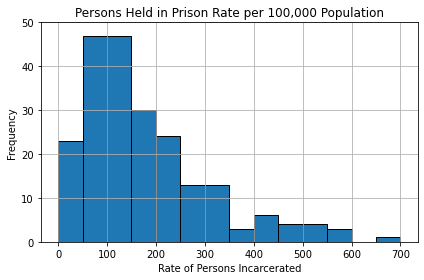

In [33]:
bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
df_rate['rate'].plot(kind='hist', edgecolor="black", bins=bins)
plt.xlabel('Rate of Persons Incarcerated')
plt.ylabel('Frequency')
plt.title('Persons Held in Prison Rate per 100,000 Population')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.tight_layout()
plt.grid()
plt.show
plt.savefig('Output/histogram_persons_imprisoned.png')

In [34]:
top20_inc=df_rate.sort_values(by='rate',ascending=False)
top20_inc=top20_inc.head(20)
top20_inc

,rate
Country,
United States of America,687.318718
Belize,585.390895
Seychelles,580.884509
Saint Kitts and Nevis,578.611161
Turkmenistan,549.262508
Virgin Islands (USA),546.931716
El Salvador,524.030888
Cuba,509.345296
Rwanda,499.333523


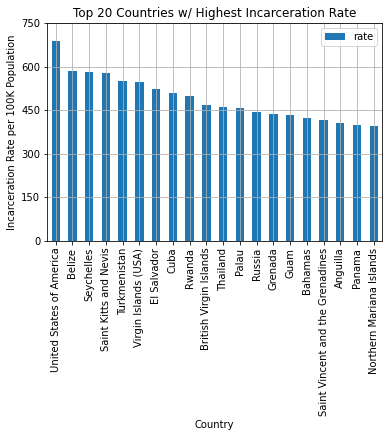

In [35]:
top20_inc.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Incarceration Rate per 100K Population')
plt.title('Top 20 Countries w/ Highest Incarceration Rate')
plt.yticks([0, 150, 300, 450, 600, 750])
plt.grid()
plt.savefig("Output/top_20_inc.png")

In [36]:
bottom20_inc=df_rate.sort_values(by='rate')
bottom20_inc=bottom20_inc.head(20)
bottom20_inc

,rate
Country,
San Marino,10.843731
Central African Republic,17.004229
Faeroe Islands,18.402778
Comoros,22.548448
Palestine,22.927270
Guinea,25.880232
Congo,28.525319
Mali,30.465406
Guinea-Bissau,31.845705


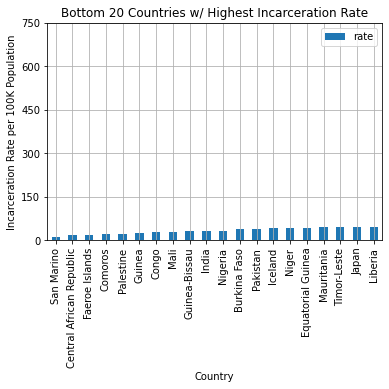

In [37]:
bottom20_inc.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Incarceration Rate per 100K Population')
plt.title('Bottom 20 Countries w/ Highest Incarceration Rate')
plt.yticks([0, 150, 300, 450, 600, 750])
plt.grid()
plt.savefig("Output/bottom_20_inc.png")

In [38]:
merge1=pd.concat([ed_exp_mean, high_school, bach_ed, master_ed, doc_ed, df_rate], axis=1)
merge1.columns=['Government Expenditure','High School', 'Bachelors', 'Masters', 'Doctoral', 'Incarceration Rate']
merge1.head(30)

,Government Expenditure,High School,Bachelors,Masters,Doctoral,Incarceration Rate
Afghanistan,3.253932,NaN,NaN,NaN,NaN,80.369164
Albania,3.496470,NaN,NaN,NaN,NaN,189.145260
Andorra,2.991917,NaN,NaN,NaN,NaN,56.551764
Argentina,5.504788,NaN,NaN,NaN,NaN,166.930236
Armenia,2.645420,NaN,NaN,NaN,NaN,127.609576
Aruba,6.499778,NaN,NaN,NaN,NaN,198.235624
Australia,5.115550,NaN,42.231148,10.234230,1.182459,150.725028
Austria,5.492163,82.093143,19.641443,15.989393,1.273311,101.665470
Azerbaijan,2.523615,NaN,NaN,NaN,NaN,229.584657
Bahrain,2.584450,NaN,NaN,NaN,NaN,248.410806


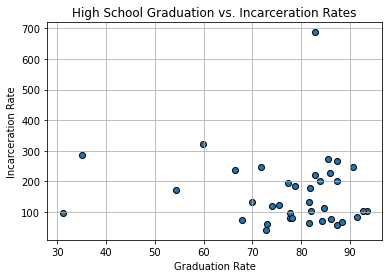

In [39]:
x_values=merge1['High School']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('High School Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
plt.savefig('Output/high_school_and_incarceration_rate.png')

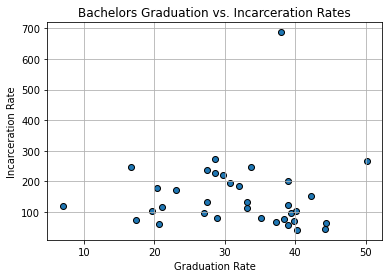

In [40]:
x_values=merge1['Bachelors']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Bachelors Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
plt.savefig('Output/bachelors_and_incarceration_rate.png')

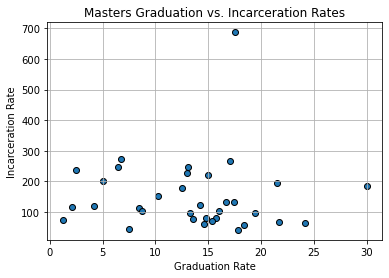

In [41]:
x_values=merge1['Masters']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Masters Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
plt.savefig('Output/masters_and_incarceration_rate.png')

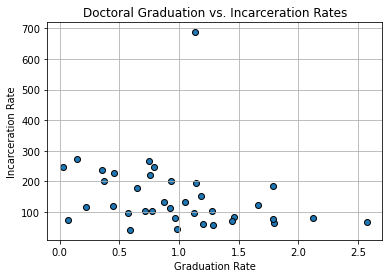

In [42]:
x_values=merge1['Doctoral']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Doctoral Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
plt.savefig('Output/doctoral_and_incarceration_rate.png')

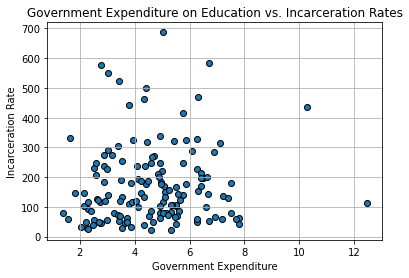

In [43]:
x_values=merge1['Government Expenditure']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Government Expenditure on Education vs. Incarceration Rates')
plt.xlabel('Government Expenditure')
plt.ylabel('Incarceration Rate')
plt.grid()
plt.savefig('Output/expenditure_incarceration.png')